In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv('/content/car_age_price.csv')
data

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000
...,...,...
107,2016,375000
108,2014,300000
109,2015,425000
110,2016,420000


Exploratory Data Analysis


In [4]:
data. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [5]:
data.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


In [6]:
data["Year"].value_counts()

2017    47
2015    22
2019    12
2018    11
2016     6
2014     6
2020     4
2013     4
Name: Year, dtype: int64

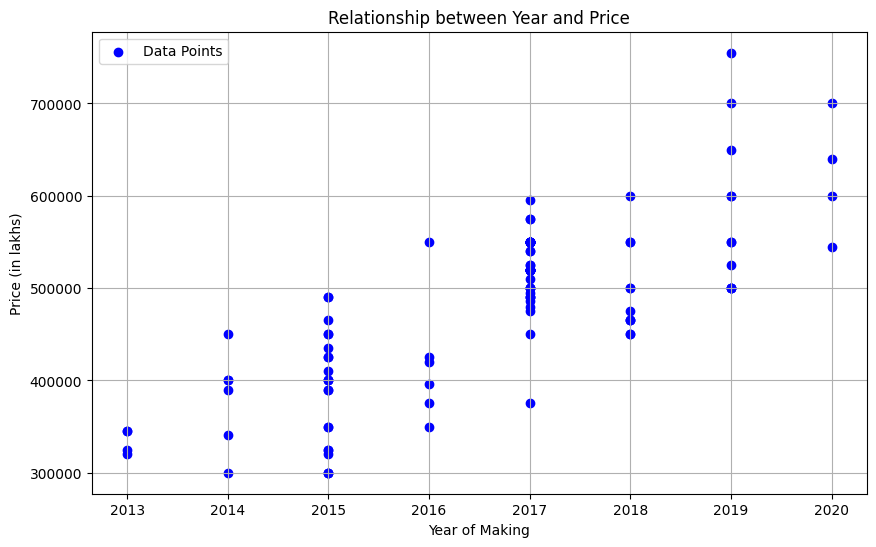

In [7]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Year'], data['Price'], color='blue', label='Data Points')
plt.xlabel('Year of Making')
plt.ylabel('Price (in lakhs)')
plt.title('Relationship between Year and Price')
plt.legend()
plt.grid(True)
plt.show()

In [8]:
duplicated=data[data.duplicated()]
duplicated

,Year,Price
3,2018,465000
4,2018,465000
9,2017,575000
15,2017,500000
16,2017,500000
18,2019,500000
19,2017,500000
20,2018,500000
21,2019,500000
23,2017,550000


In [9]:
data.drop_duplicates(inplace=True)
data.shape

(58, 2)

In [10]:
data["Year"].value_counts()

2017    15
2015    12
2019     7
2018     6
2016     6
2014     5
2020     4
2013     3
Name: Year, dtype: int64

In [11]:
data.isna().sum()

Year     0
Price    0
dtype: int64

## Linear Regression Model

In [12]:
x=data.drop(["Price"],axis=1)


In [13]:
y=data["Price"]

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.2)

In [15]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr_model=lr.fit(x_train,y_train)
lr_predict=lr_model.predict(x_test)

In [21]:
from sklearn.metrics import mean_squared_error,r2_score
mse_linear=mean_squared_error(y_test,lr_predict)
print("Mean Squared Error(Linear Regression)= ",mse_linear)
print("R Squared Error=",r2_score(y_test,lr_predict))

Mean Squared Error(Linear Regression)=  3545632860.9680295
R Squared Error= 0.7258825663162266


## Lasso Regression model

In [22]:
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=0.1)
ls_model=lasso.fit(x_train,y_train)
ls_predict=ls_model.predict(x_test)
mse_lasso=mean_squared_error(y_test,ls_predict)
print("Mean Squared Error(Lasso Regression)= ",mse_lasso)
print("R Squared Error=",r2_score(y_test,ls_predict))

Mean Squared Error(Lasso Regression)=  3545634157.5119324
R Squared Error= 0.7258824660787511


## Compare Performance

Mean Squared Error (Linear Regression): 3545632860.9680295
Mean Squared Error (Lasso Regression): 3545634157.5119324


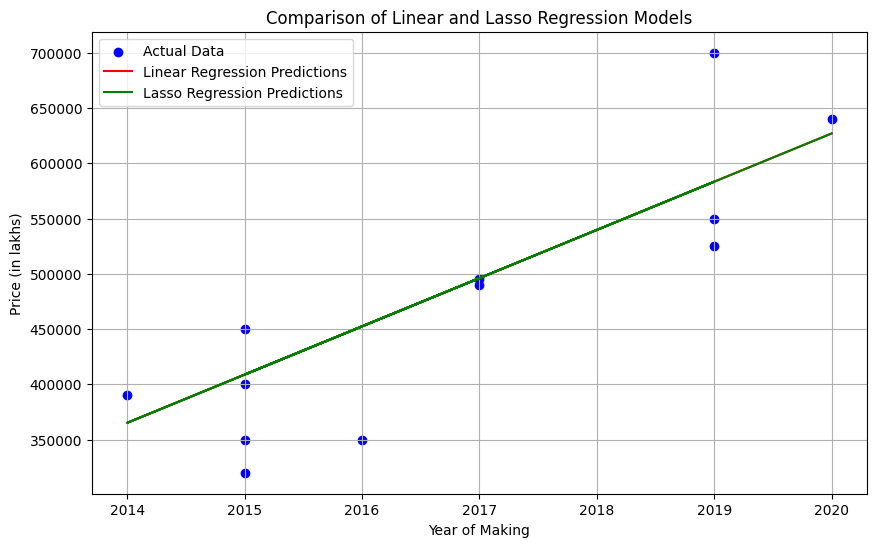

In [25]:
print('Mean Squared Error (Linear Regression):', mse_linear)
print('Mean Squared Error (Lasso Regression):', mse_lasso)

plt.figure(figsize=(10, 6))
plt.scatter(x_test, y_test, color='blue', label='Actual Data')
plt.plot(x_test, lr_predict, color='red', label='Linear Regression Predictions')
plt.plot(x_test, ls_predict, color='green', label='Lasso Regression Predictions')
plt.xlabel('Year of Making')
plt.ylabel('Price (in lakhs)')
plt.title('Comparison of Linear and Lasso Regression Models')
plt.legend()
plt.grid(True)
plt.show()

## Prediction of the Price in the year 2022(Using Linear Regression)

In [26]:
x_2022=pd.DataFrame({'Year':[2022]})
lr_predict=lr_model.predict(x_2022)

In [27]:
np.round(lr_predict,2)

array([714251.93])

In [28]:
print('The value of 2022 model seond-hand Hundai grand i10 car is ',lr_predict)

The value of 2022 model seond-hand Hundai grand i10 car is  [714251.93129772]
